## Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Reading data and data exploration

In [3]:
data = pd.read_excel('./5-8oct.xlsx',index_col=None)
data

,goodOrBad,_id,rate,comment,deviceModel,vendor,created_at,Unnamed: 7,Unnamed: 8
0,False,6522fa477a2f090030fb02ee,3,NaN,Chrome,Android,mobile,K,NaN
1,True,6522f6407a2f090030fb02eb,5,NaN,Chrome,Windows,NaN,NaN,NaN
2,True,6522f6097a2f090030fb02e8,4,NaN,Chrome,Android,mobile,K,NaN
3,True,6522f5cc7a2f090030fb02e5,4,NaN,Chrome,Windows,NaN,NaN,NaN
4,True,6522f5697a2f090030fb02e2,5,NaN,Chrome,Android,mobile,K,NaN
...,...,...,...,...,...,...,...,...,...
2402,True,651cff2f7a2f090030fae6c8,5,NaN,Chrome,Android,mobile,SM-A307FN,Samsung
2403,True,651cff2f7a2f090030fae6c5,5,NaN,Android,mobile,114.0.0.0,NaN,2023-10-04T05:59:11.120Z
2404,True,651cff2e7a2f090030fae6c2,4,NaN,Chrome,Windows,NaN,NaN,NaN
2405,True,651cff2d7a2f090030fae6bf,5,NaN,Android,mobile,114.0.0.0,NaN,2023-10-04T05:59:09.800Z


In [4]:
data.describe()

,rate
count,2407.000000
mean,4.177399
std,1.238958
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


as we can see there is only one numerical feature and the rest are categorical and text

In [5]:
print(data.shape,end="\n\n\n")
print(data.keys())

(2407, 9)


Index(['goodOrBad', '_id', 'rate', 'comment', 'deviceModel', 'vendor',
       'created_at', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [6]:
data.isnull().sum()

goodOrBad         0
_id               0
rate              0
comment        2378
deviceModel       0
vendor           22
created_at      773
Unnamed: 7      877
Unnamed: 8     1749
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

goodOrBad         2
_id            2407
rate              5
comment          29
deviceModel      19
vendor           24
created_at       31
Unnamed: 7      184
Unnamed: 8       57
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   goodOrBad    2407 non-null   bool  
 1   _id          2407 non-null   object
 2   rate         2407 non-null   int64 
 3   comment      29 non-null     object
 4   deviceModel  2407 non-null   object
 5   vendor       2385 non-null   object
 6   created_at   1634 non-null   object
 7   Unnamed: 7   1530 non-null   object
 8   Unnamed: 8   658 non-null    object
dtypes: bool(1), int64(1), object(7)
memory usage: 152.9+ KB


## Data Preprocessing 

#### *Cleaning data*

In [10]:
data.drop('_id', axis=1, inplace=True)
data.drop('comment', axis=1, inplace=True)
data

,goodOrBad,rate,deviceModel,vendor,created_at,Unnamed: 7,Unnamed: 8
0,False,3,Chrome,Android,mobile,K,NaN
1,True,5,Chrome,Windows,NaN,NaN,NaN
2,True,4,Chrome,Android,mobile,K,NaN
3,True,4,Chrome,Windows,NaN,NaN,NaN
4,True,5,Chrome,Android,mobile,K,NaN
...,...,...,...,...,...,...,...
2402,True,5,Chrome,Android,mobile,SM-A307FN,Samsung
2403,True,5,Android,mobile,114.0.0.0,NaN,2023-10-04T05:59:11.120Z
2404,True,4,Chrome,Windows,NaN,NaN,NaN
2405,True,5,Android,mobile,114.0.0.0,NaN,2023-10-04T05:59:09.800Z


the id and comment columns has removed due to the fact that they had no gain for our data and just made the data more complex, the comment had 2378 NaN values and the id column wasn't numerical or categorical and it was not helpful at all. And for sure we must delete the last 3 of the columns because they have a lot of useless values but we won't because we need them to complete the task.

In [11]:
data.rename(columns={'Unnamed: 7': 'DeviceModel'}, inplace=True)
data.rename(columns={'Unnamed: 8': 'DeviceBrand'}, inplace=True)
data.rename(columns={'rate': 'Rate'}, inplace=True)
data.rename(columns={'deviceModel': 'UsedPlatform'}, inplace=True)
data.rename(columns={'created_at': 'CreateDate'}, inplace=True)
data.rename(columns={'vendor': 'Vendor'}, inplace=True)
data.rename(columns={'goodOrBad': 'GoodOrBad'}, inplace=True)

In [12]:
data['Vendor'] = data['Vendor'].fillna(0)
data['Vendor'].isnull().sum()

0

### *the text data must be encoded to number in real examples otherwise there is not much gain from it if it is text and there are a lot of more cleaning data but we won't do it just to keep the notebook simpler*

## Please create a histogram plot for goodOrBad column in the dataset

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


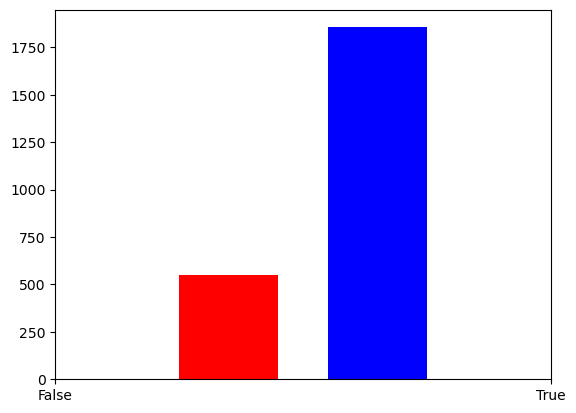

In [13]:
gb = data['GoodOrBad']
true_values = [value for value in gb if value == True]
false_values = [value for value in gb if value == False]
plt.hist([true_values,false_values], bins=2, color=['blue', 'red'])
plt.xticks([0, 1], ['False', 'True'])
plt.show()

## *As you can observe the major part of the goodOrBad column is for True values which is up to 1750 samples of the data and the rest belongs to False values approximately up to 500 and half*

In [14]:
# getting the exact count of the true/false values
print(gb.value_counts().get(False))
print(gb.value_counts().get(True))

551
1856


## Please create a histogram plot for vendor column in the dataset

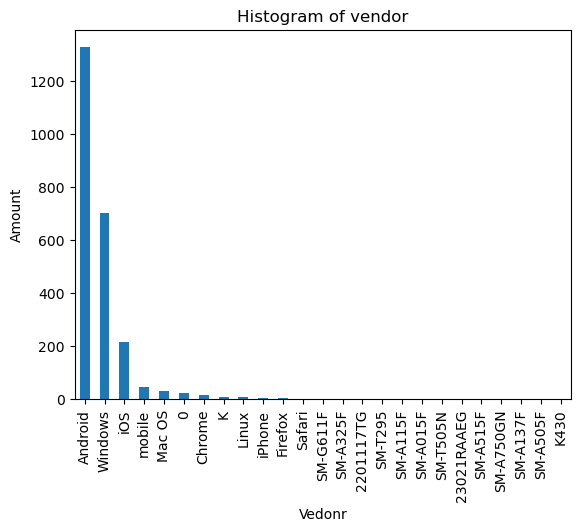

Android amount: 1327
Windows amount: 701
IOS amount: 215
Mobile amount: 46


In [15]:
data['Vendor'].value_counts().plot(kind='bar')
plt.title('Histogram of vendor')
plt.xlabel('Vedonr')
plt.ylabel('Amount')
plt.show()

print("Android amount:",data['Vendor'].value_counts().get("Android"))
print("Windows amount:",data['Vendor'].value_counts().get("Windows"))
print("IOS amount:",data['Vendor'].value_counts().get("iOS"))
print("Mobile amount:",data['Vendor'].value_counts().get("mobile"))


### Here in this histogram all the platforms are easily observable and the majority of used platforms belongs to Android,Windows,IOS,Mobile and we can see the exact value of them at the bottom of the hist and if you look closely there is a 0 vendor which stands for null values and it's ok to drop , and the rest of the platforms and venors are free to be removed because we may have a very few of them in the data set so they are not very usefull.

## Please create a histogram plot for vendors column in the dataset that show the the mount of true or false of goodOrBad column in the dataset by different colors.

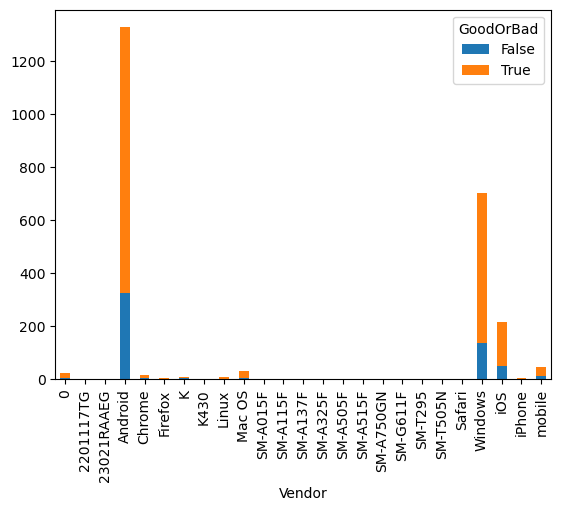

In [16]:
counts = data.groupby(['Vendor', 'GoodOrBad']).size().unstack()
counts.plot(kind='bar', stacked=True)
plt.show()

### As you can see we have this HistPlot over here which demonstrates being good or bad of each vendor ,for example the amount of False GoodOrBad samples on Android vendor is less than 400 and the rest are True values for android, and this stands for all the columns here.

## Please create a pie plot for rate column in the dataset.

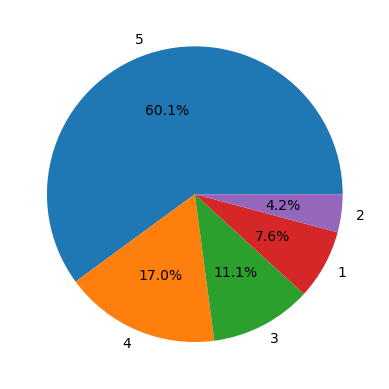

5    1446
4     410
3     267
1     184
2     100
Name: Rate, dtype: int64


In [17]:
ds = data["Rate"].value_counts()
plt.pie(ds,labels=ds.index,autopct='%1.1f%%')
plt.show()
print(ds)

### So now in this pie plot we have attempted to visualize the amount of each value in the Rate column , there are only 5 unique values in this column so this states that this is a categorical column , we have no null values and 60.1% for 1446 out of 2407 people rated for 5 which it's the highest rate score, and the rest of the values are easily observeable,the least precentage belongs to score 2 with only 100 rates and it's only 4.2 out of all.

## Please create a scatter plot for all rate,vendor and goodOrBad columns in the dataset. Show me your genius!

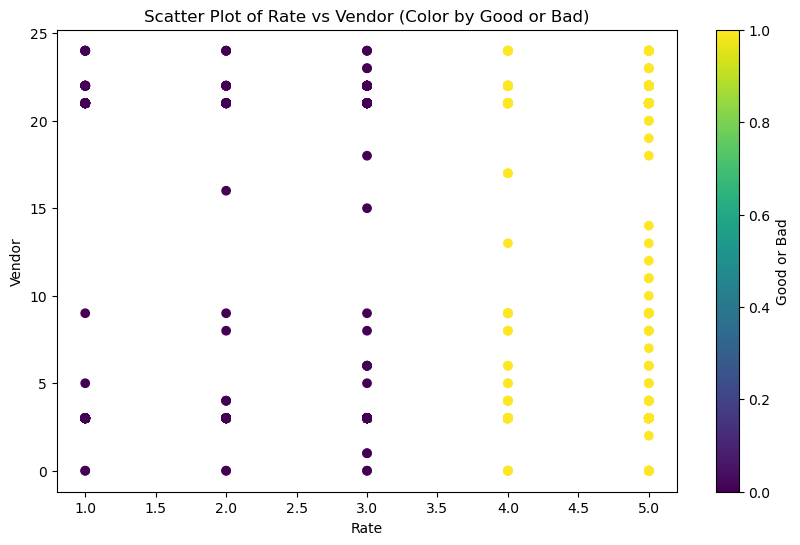

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rate'], data['Vendor'].astype('category').cat.codes, c=data['GoodOrBad'], cmap='viridis')
plt.xlabel('Rate')
plt.ylabel('Vendor')
plt.title('Scatter Plot of Rate vs Vendor (Color by Good or Bad)')
cbar = plt.colorbar()
cbar.set_label('Good or Bad')
plt.show()


### Here we have shown the rating on the X axis and vendor on the Y axis , the color stands for the state of being good or bad according to the GoodOrBad column, and the number of points in the scatter plot depends on the unique combinations of Rate and Vendor values in our data and this causes having much less points as we expected. down here we can add some noisy data to our scatter plot so we can have more points

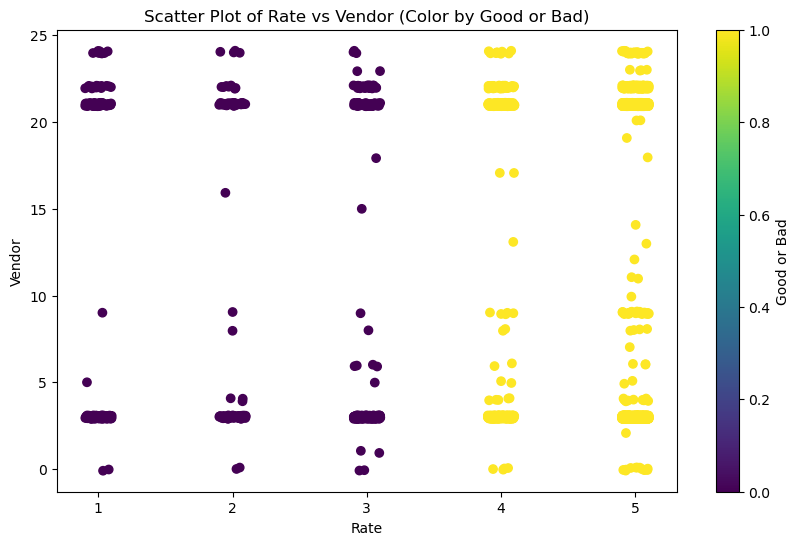

In [25]:
plt.figure(figsize=(10, 6))
jitter = 0.1 
rate_jittered = data['Rate'] + np.random.uniform(-jitter, jitter, size=len(data))
vendor_jittered = data['Vendor'].astype('category').cat.codes + np.random.uniform(-jitter, jitter, size=len(data))
plt.scatter(rate_jittered, vendor_jittered, c=data['GoodOrBad'], cmap='viridis')
plt.xlabel('Rate')
plt.ylabel('Vendor')
plt.title('Scatter Plot of Rate vs Vendor (Color by Good or Bad)')
cbar = plt.colorbar()
cbar.set_label('Good or Bad')
plt.show()

### It's good to note that it's better to do it individually like the codes below

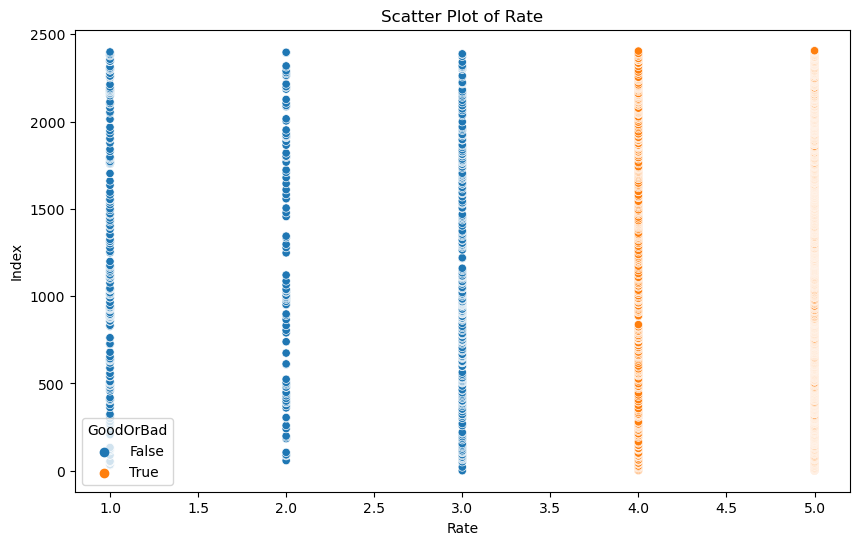

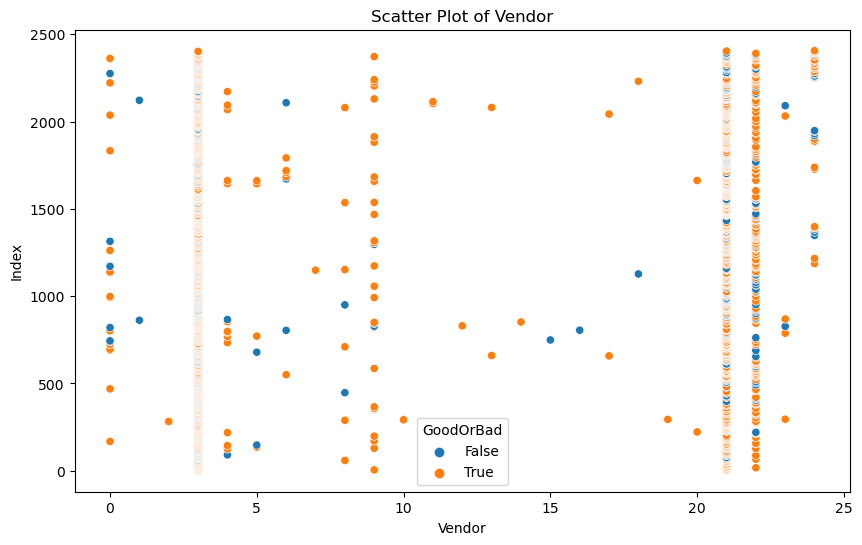

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=data['Rate'], y=range(len(data)), hue=data['GoodOrBad'])
plt.xlabel('Rate')
plt.ylabel('Index')
plt.title('Scatter Plot of Rate')
plt.show()
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=data['Vendor'].astype('category').cat.codes, y=range(len(data)), hue=data['GoodOrBad'])
plt.xlabel('Vendor')
plt.ylabel('Index')
plt.title('Scatter Plot of Vendor')
plt.show()


### And here in these we have demonstrated all rates and vendors and splited them by good or bad as you can see and this also is achiveable with matplotlib as you can see below

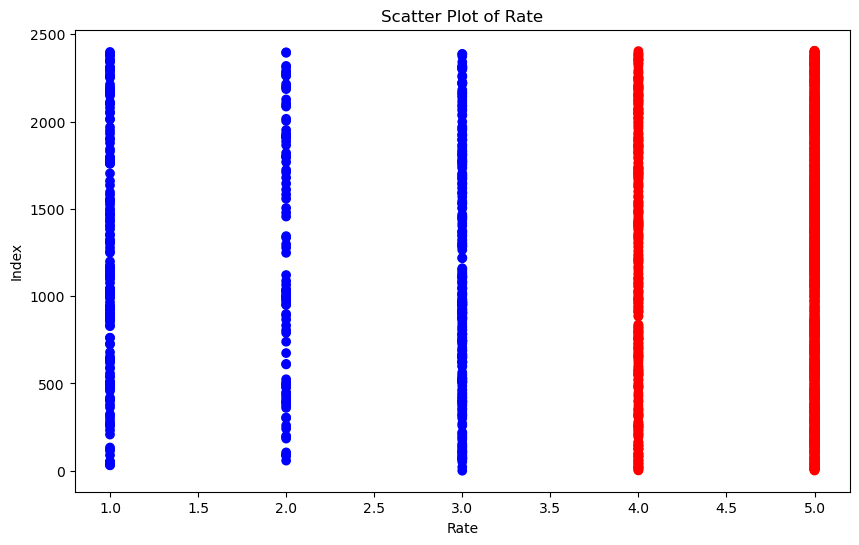

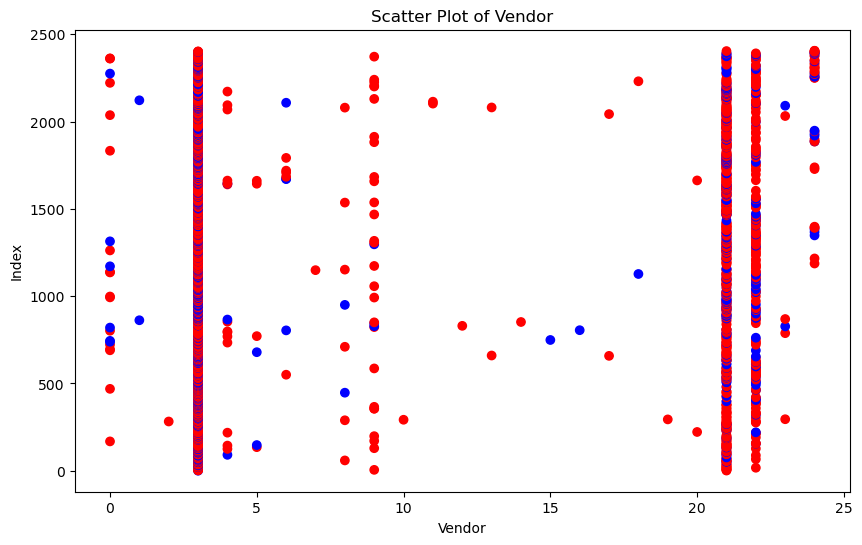

In [28]:
colormap = np.where(data['GoodOrBad']==1, 'r', 'b')
plt.figure(figsize=(10, 6)) 
plt.scatter(data['Rate'], range(len(data)), c=colormap)
plt.xlabel('Rate')
plt.ylabel('Index')
plt.title('Scatter Plot of Rate')
plt.show()
plt.figure(figsize=(10, 6)) 
plt.scatter(data['Vendor'].astype('category').cat.codes, range(len(data)), c=colormap)
plt.xlabel('Vendor')
plt.ylabel('Index')
plt.title('Scatter Plot of Vendor')
plt.show()


## Here we can easily see that values are shown and seperated by goodorbad col , if it's good so it's red and if it's bad it's blue 

## Down here we have a r-lang output for analyzing the regression formula on the relation between sbp and bmi answer the below questions according to the output:

In [ ]:
Call:
lm (formula = BMI - SBP)
Residuals:
    Min       1Q      Median        3Q      Max
  -7.4217  -2.5207    0.0925       2.0693  8.4970
Coefficients:
               Estimate   Std.  Error       t value      Pr (>|tI)
(intercept）   22. 64955       2.94499       7.691         2.02e-10    ***
SBP            0.03943         0.02122        1.858          0.0682
Signif. codes:  O '***'  0.001 '**'  0.01 '*' 0.05 '.' 0.1 ' ' 1 
Residual standard error: 3.894 on 58 degrees of freedom
Multiple R-squared: 0.0562, Adjusted R-squared: 00.3993
F-statistic: 3.454  on 1 and 58 DF, p-value: 0.06819

Write the regression coefficients (b0 and b1) of the model:

RC formula : Y = aX + b
Y = Predicted value of dependent variable for given X value,
X = Independent variable , 
a = Slope of the line which shows the effect of X on Y,
b = Intercept value,

in the provided output we have 2 estimated values known as b0 and b1 
*b0 is 22.64955* same as *intercept which stands for the value of dependent variable (bmi) when the independent variable (sbp) is equivlent to 0* , in simple terms this means if the SBP is 0 the BMI will be 22.64955.  
and *b1 is 0.03943*, which represents the change in the dependent variable (BMI) for a one-unit change in the independent variable (SBP).to clarify this means for each increasing-unit of SBP we must add 0.03943 to our BMI.
formula for our case: Y = b0 + b1 * (independent variable : SBP).

for example if the SBP was 15 we would have the following equation according to information above:
22.64955 + 0.03943 * 15 = 23.241

b0 = 22.64955
b1 = 0.03943

----------------------------------------------------------------------------

Calculate the p-values for the regression coefficients (b0 and b1) of the model:

P-values help us assess the reliability of the results.Smaller p-values indicate stronger evidence against a null hypothesis.

p-values of b0 and b1 has provided utterly for us in the output :
p-value of b0 is : [2.02e-10] that equals to [0.000000000202] which is an extremely small number and it has ( *** ) next to it which this means that the number is very low and under 0.001 and secondly this indicates high statistical significance in the context of the linear regression model,ultimately this tiny p-value indicates strong evidence against the idea that the intercept is zero, and we can easily see this in the output.

the second p-value belongs to b1 and it's equivlent to [0.0682].This p-value is a bit larger than the common [0.05] significance level but smaller than 0.1.

-----------------------------------------------------------------------------

Find confidence intervals for these coefficients:
###### *according to the provided output we have these values:*
b0 = 22.64955 ,
b1 = 0.03943 , 
Standard error for intercept = 2.94499 , 
Standard error for SBP = 0.02122 , 
Degree of freedom = 58 , 
t-critical value = Based on what we have in the output so far , there is no specified confidence level 
so we must assume it on the usuall precentage of [95%]
and t-critical value for df [58] on [95%] confidence level is [2.002] which we can find it on 
t-distributaion table.
The confidence intervals formula is: CI = sample mean ± t-critical-value * std-error
now for calculating the CI for b0 (intercept estimate) we can say :
Upper-Bound is : [22.64955 + (2.002 * 2.94499) =  28.54541998]
Lower-Bound is : [22.64955 - (2.002 * 2.94499) = 16.75368002]
and for SBP (b1) we say : 
Upper-Bound = [0.03943 + (2.002 * 0.02122) = 0.08191244]
Lower-Bound = [0.03943 - (2.002 * 0.02122) = -0.00305244]
#### It's needed to mention a point that we use a similar operation in our codes to detect outlier numerical data in code.

--------------------------------------------------------------------------------

Does the variable SBP have an impact on BMI?

According to the model, for each unit of sbp the bmi increases for 0.03943 
and now to assess the impact we can use P-value:
SBP p-value = 0.0682,
p-value below a significance level (0.05) suggests that there is evidence of not being random. In simpler terms, a p-value below 0.05 indicates that the observed results are significant, which provides the assumption that there are some effects.

and here in our case p-value is hardly significant because it's between 0.05 and 0.1 and this indicates that there is *some evidence against* the idea that the effect of SBP on BMI is none.

So basicaly , yes SBP has SOME impact on BMI. :)